## Circle Detection using Hough Circle Transform

Hough Transform says if an image can be representated in mathematical form, it can be detected.

Circle can be represtated by:

sqr(x - x(center)) + sqr(y - y(center)) = sqr(radius) where x(center), y(center) are center coordinate.



In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv.imread('smarties.jpg')

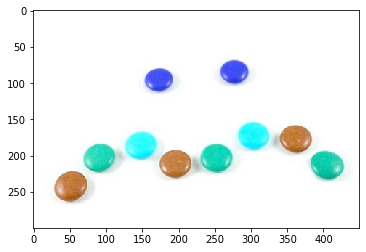

In [3]:
plt.imshow(image)

In [4]:
output = image.copy()

In [8]:
output_gray = cv.cvtColor(output, cv.COLOR_BGR2GRAY) #convert to grayscale

In [10]:
#Hough images work better with blurred image, using meadian_blur method
#values:(image, kernel )

output_gray_blur = cv.medianBlur(output_gray, 5)

#### Hough circle transform - have only one implemented method(Hough_Gradient)

##### values_description:

dp - inverse ration of accumulator resolution to image resolution
     example if dp=1 the accumulator has same resolution as input image
             if dp=2 the ccumulator has 1/2 as width and height of imput image  

minDist - minimun distance between centers of detected circles(adjust if circles near to each other)

param1 - First method specific param, Incase of Hough_Gradient it is the higher threshold of two passed to Canny edge detector (lower one is twice as small)

param2 - Second method specific param, Incase of Hough_Gradient, it is the accumulator thresholdo for the circle center at the dectection stage

minRadius

maxRadius - 

values:(image, method, dp, minDist, param1, param2, minR, MaxR)

In [12]:
#apply hough circle method. The output is circle vector with x, y and radius, we need to convert to integer 

circles = cv.HoughCircles(output_gray_blur, cv.HOUGH_GRADIENT, 1, 20, 
                          param1=50, param2=30, minRadius=0, maxRadius=0)

In [14]:
(circles)

array([[[253.5, 203.5,  19.9],
        [ 53.5, 245.5,  24.1],
        [361.5, 172.5,  23. ],
        [303.5, 173.5,  19.6],
        [195.5, 210.5,  21. ],
        [146.5, 186.5,  19.3],
        [ 91.5, 205.5,  21.8],
        [405.5, 210.5,  22.9],
        [277.5,  83.5,  18.1],
        [171.5,  92.5,  19.6]]], dtype=float32)

In [15]:
#convert to integer, from hough circles.

detected_circle = np.uint16(np.around(circles))

In [16]:
#iterate over those circles, since it has x, y and r we will directly extract

for (x, y, r) in detected_circle[0, :]:
    
    #draw the circle on the copy image 
    cv.circle(output, (x, y), r, (0, 255, 0), 3)
    
    #draw the center, if the radius(2) is very small it will draw almost point
    cv.circle(output, (x, y), 2, (0, 255, 255), 3)
    
    


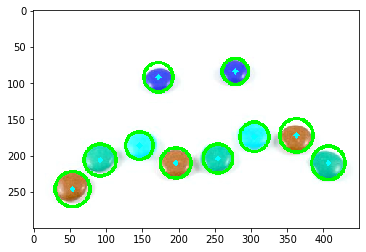

In [18]:
#can see 
plt.imshow(output)

In [17]:
cv.imshow('circles', output)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)

-1